In [7]:
from Document import Document
from ParserCACM import ParserCACM
from ParserQuery import QueryParser
from porter import stem
from TextRepresenter import PorterStemmer
import pickle
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

from EvalIRModel import EvalIRModel
from Index import Index, InvertedIndexPlaces
from Weighter import WeighterBoolean, WeighterVector
from IRModel import Vectoriel, LanguageModel, BM25Model, LinearMetaModel
from Featurer import Featurer

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
index = Index("cacm", "cacm/cacm.txt")
featurer = Featurer(index)
#index.indexation()
#weighter = WeighterVector(index)
#weighter.calculeNorms()
#model = Vectoriel(weighter)
#model = BM25Model(weighter)
#model = LanguageModel(weighter)

precalcul features


In [9]:
lin_model = LinearMetaModel(featurer)

[ 0.01316088 -0.06874706  0.08515927  0.03165088  0.08577173  0.0062634
 -0.16515646]
Queries : (64,)
Iteration 0
Iteration 8
Iteration 16
Iteration 24
Iteration 32
Iteration 40
Iteration 48
Iteration 56
Iteration 64
Iteration 72
Iteration 80
Iteration 88
Iteration 96
Iteration 104
Iteration 112
Iteration 120
Iteration 128
Iteration 136
Iteration 144
Iteration 152
Iteration 160
Iteration 168
Iteration 176
Iteration 184
Iteration 192
Iteration 200
Iteration 208
Iteration 216
Iteration 224
Iteration 232
Iteration 240
Iteration 248
Iteration 256
Iteration 264
Iteration 272
Iteration 280
Iteration 288
Iteration 296


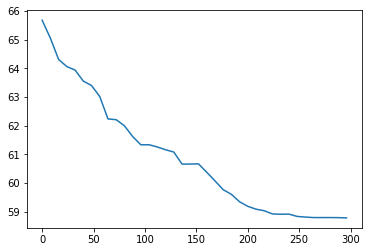

In [10]:
losses = lin_model.train(300, 0.0000006, 0.1, loss_interval=8)
lin_model.save_weights()
data = np.array(losses)
plt.plot(data[:,0],data[:,1])

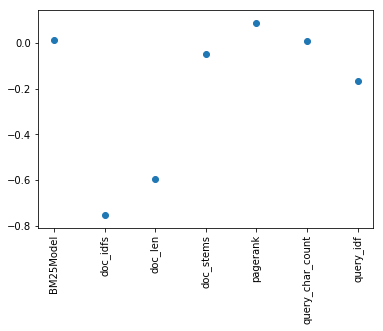

In [11]:
plt.scatter(np.arange(7), lin_model.thetas)
plt.xticks(np.arange(7),lin_model.attribute_names, rotation='vertical');